In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")
# root = Path("/mnt/ssd-1/alexm/w2s/results/sciq_support_contains/")
root = Path("/mnt/ssd-1/alexm/w2s/results/ethics_deontology_excuse_only/")

In [20]:
# all subdirectories of the form `run_name`*
# title = "Amazon Polarity \"look at title only\" multiple oracle epochs"
# title = "Sciq with support \"does context contain `ans`\""
suffix = "_sft2"
data = []
configs = []
subdirs = [
    f"am_title_0{suffix}",
    f"am_title_32x48{suffix}",
    # f"am_title_128x12{suffix}",
    f"am_title_512{suffix}",
    f"am_title_512x4{suffix}",
    # f"am_title_2000{suffix}",
    # f"am_title_2000x4{suffix}",
    f"am_title_8000{suffix}",
    # "am_title_0_orepoch",
    # "am_title_32x48_orepoch",
    # "am_title_128x12_orepoch",
    # "am_title_512_orepoch",
    # "am_title_512x4_orepoch",
    # "am_title_2000_orepoch",
    # "am_title_2000x4_orepoch",
    # "am_title_8000_orepoch",
    # "am_title_0_matching",
    # "am_title_32x48_matching",
    # "am_title_128x12_matching",
    # "am_title_512_matching",
    # "am_title_512x4_matching",
    # "am_title_2000_matching",
    # "am_title_2000x4_matching",
    # "am_title_8000_matching",
    # "ss_contains_0",
    # "ss_contains_32x48",
    # "ss_contains_128x12",
    # "ss_contains_512",
    # "ss_contains_512x4",
    # "ss_contains_2000",
    # "ss_contains_2000x4",
    # "ss_contains_8000",
    # 'am_title_0',
    # 'am_title_32x48',
    # 'am_title_128x12',
    # 'am_title_512',
    # 'am_title_512x4',
    # 'am_title_2000',
    # 'am_title_2000x4',
    # 'am_title_8000',
]

names = []
for name in subdirs:
    d = root / name
    # df = pd.read_json(d / "results.json", orient="records", lines=True)
    dicts = []
    for fname in d.glob("results_*.json"):
        with open(fname) as f:
            dicts.append(json.load(f))
    if len(dicts) == 0:
        continue
    df = pd.DataFrame(dicts).sort_values("num_oracle")
    # with open(d / "config.json") as f:
    #     config = json.load(f)
    data.append(df)
    names.append(name)
    # configs.append(config)


In [25]:
data[1]

,auroc,acc,auroc_against_weak,acc_against_weak,weak_soft_labels,num_weak,num_oracle,oracle_ids,ids,calibrated_logodds,gt_soft_labels
1,0.925848,0.854000,0.893307,0.819000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,0,[],"[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[0.609375, -0.04357147216796875, -0.2607421875...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
6,0.931205,0.708667,0.885839,0.713000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,4,"[165fb7c0, d261facc, 59d70839, 9089959b]","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[-4.734375, -5.515625, -7.4375, -6.828125, 6.1...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
5,0.925290,0.810667,0.883546,0.789667,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,16,"[0b2875b2, 13878dfb, 395e8287, 40e0a328, 53fb3...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[0.7578125, 7.234375, -7.921875, -7.390625, 8....","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
4,0.981245,0.947333,0.921749,0.875000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,64,"[30a900d5, 0b2875b2, 69d1ca0f, 917f9b38, 1242a...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[9.25, 9.21875, -10.34375, -10.375, 8.71875, -...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
0,0.990007,0.966667,0.899895,0.861667,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,256,"[850fc54f, e7df8319, 7f329aa8, 84b3b1ac, e660b...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[6.6875, 5.984375, -7.34375, -6.578125, 5.9843...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
3,0.992837,0.970333,0.929898,0.858000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,1024,"[850fc54f, 0e515d36, 240c98b0, 97928a76, bc7ea...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[6.40625, 5.5625, -6.671875, -6.046875, 6.2187...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
2,0.994496,0.974000,0.923934,0.855000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,4096,"[850fc54f, 3e677108, d53443eb, 97928a76, e5a51...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[6.40625, 5.328125, -7.03125, -5.765625, 5.578...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."


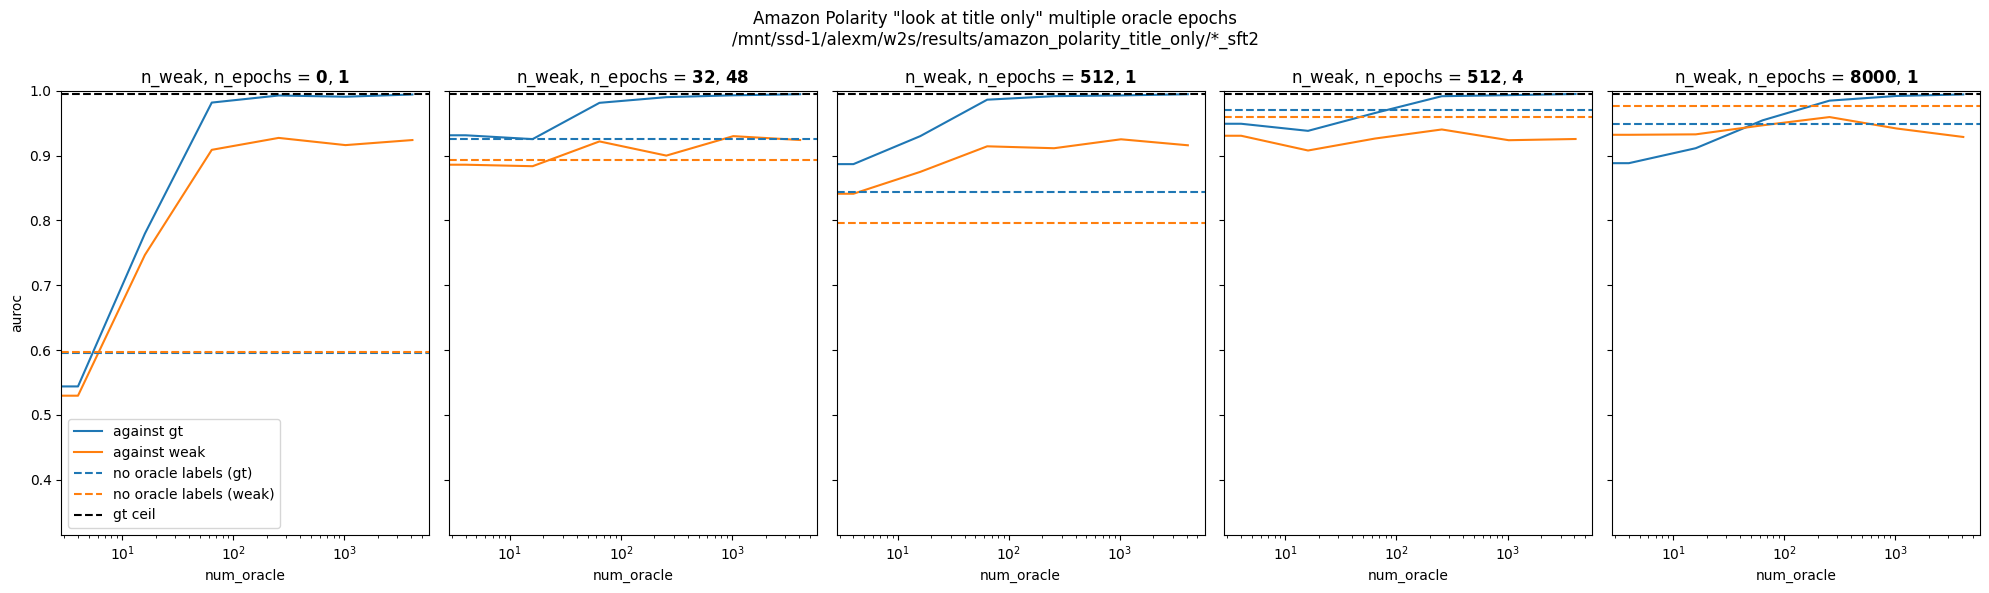

In [24]:
# I want a horizontal grid of aligned subplots, one for each n_weak, with x-axis=n_oracle, and y_axis=auroc

rows, cols = 1, 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 6), sharey=True, sharex=True)
metric = "auroc"
for i, (df, name) in enumerate(zip(data, names)):
    if i == 0:
        gt_ceil = df[metric].max()
    ax = axs[i // cols, i % cols] if rows > 1 else axs[i % cols]
    plt.sca(ax)
    plt.ylim(0.315, 1)
    sns.lineplot(x="num_oracle", y=metric, data=df, label="against gt" if i == 0 else None)
    sns.lineplot(x="num_oracle", y=f"{metric}_against_weak", data=df, label="against weak" if i == 0 else None)
    # horizontal lines for num_oracle = 0
    zero_row = df[df["num_oracle"] == 0]
    ax.axhline(zero_row[metric].values[0], color="tab:blue", linestyle="--", label="no oracle labels (gt)" if i == 0 else None)
    ax.axhline(zero_row[f"{metric}_against_weak"].values[0], color="tab:orange", linestyle="--", label="no oracle labels (weak)" if i == 0 else None)
    ax.axhline(gt_ceil, color="black", linestyle="--", label="gt ceil" if i == 0 else None)
    if i == 0:
        plt.legend()

    last = name.split("_")[-2]
    if "x" in last:
        n_weak, n_epochs =last.split("x")
    else:
        n_weak = last
        n_epochs = "1"

    plt.title("n_weak, n_epochs = $\mathbf{" + n_weak + "}$, $\mathbf{" + n_epochs + "}$")
    plt.semilogx()
    plt.xlabel("num_oracle")
    plt.ylabel(metric)

plt.suptitle(f"{title}\n{root}/*{suffix}")
plt.tight_layout()
plt.show()

# multiple seeds

In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

root = Path("/mnt/ssd-1/alexm/w2s/results/ethics_deontology_excuse_only/")
title = "Ethics Deontology excuse only"
prefix = "70B_ethics_excuse"
# root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")
# title = "Amazon Polarity \"look at title only\""
# prefix = "am_title"
# root = Path("/mnt/ssd-1/alexm/w2s/results/sciq_support_contains/")
# title = "Sciq with support \"does context contain `ans`\""
# prefix = "ss_contains"
min_num_oracle = 1

metric = "auroc"
sft_n_weak, sft_n_epochs = "1", "0"
sft_subdirs = root.glob(f"{prefix}_{sft_n_weak}x{sft_n_epochs}_seed*_sft")
active_n_weak, active_n_epochs = "32", "48"
active_subdirs = root.glob(f"{prefix}_{active_n_weak}x{active_n_epochs}_seed*_active")

# x-axis: num_oracle, y-axis: auroc
# one line for sft, one line for active, each with shaded error bars

sft_data = []
active_data = []
for name in sft_subdirs:
    d = name
    for fname in d.glob("results_*.json"):
        with open(fname) as f:
            sft_data.append(json.load(f))
for name in active_subdirs:
    d = name
    for fname in d.glob("results_*.json"):
        with open(fname) as f:
            active_data.append(json.load(f))

sft_df = pd.DataFrame(sft_data).sort_values("num_oracle")
active_df = pd.DataFrame(active_data).sort_values("num_oracle")
sft_df = sft_df[sft_df["num_oracle"] >= min_num_oracle]
active_df = active_df[active_df["num_oracle"] >= min_num_oracle]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.sca(ax)
plt.ylim(0.5, 1)
# plt.axhline(0.994, color="black", linestyle="--", label="gt ceil")  # NOTE: this is a placeholder
sns.lineplot(x="num_oracle", y=metric, data=sft_df, errorbar="sd", label=f"sft {sft_n_weak}x{sft_n_epochs} weak ($\pm$ sd)")
sns.lineplot(x="num_oracle", y=metric, data=active_df, errorbar="sd", label=f"active {active_n_weak}x{active_n_epochs} weak ($\pm$ sd)")
plt.semilogx(base=2)
plt.xlabel("num_oracle")
plt.ylabel(metric)
plt.legend()
plt.title(title)
plt.tight_layout()
plt.show()

KeyError: 'num_oracle'

In [44]:
import pandas as pd
import json
from pathlib import Path
from collections import defaultdict

root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")
globs = ["am_title_online_sampling_s1_*", "am_title_temp0.25_s3_*", "am_title_temp0.7_s3_*", "am_title_debug_*", "am_title_newseed_*", "am_title_newseed2_*", "am_title_online_sampling_s2_*", "am_title_online_sampling_s2_*1"] #"am_title_one_epoch_*"]

def remove_large_entries(r):
    r = r.copy()
    for k in {"weak_soft_labels", "ids", "oracle_ids", "calibrated_logodds", "gt_soft_labels"}:
        if k in r:
            del r[k]
    return r


datas = []
for glob in globs:
    subdirs = root.glob(glob)
    
    for subdir in subdirs:
        try:
            data = remove_large_entries(json.load((subdir / "results.json").open()))
            cfg = json.load((subdir / "config.json").open())
            data.update(cfg)
            data["cfg"] = cfg
            data.update({"method": subdir.name})
            print(subdir)
        except FileNotFoundError:
            print(f"missing {subdir}")
            continue
        
        datas.append(data)
df = pd.DataFrame(datas)

missing /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_online_sampling_s1_0
missing /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_online_sampling_s1_2
missing /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_online_sampling_s1_1
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_4
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_1
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_0
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_2
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_3
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_4
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_1
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_3
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_2
/mnt/ssd-1/

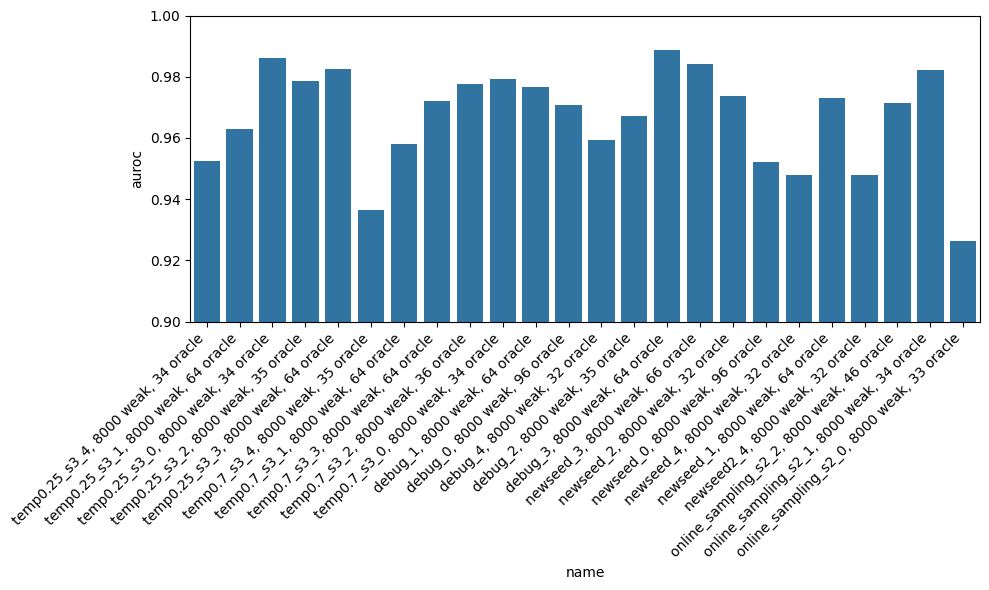

In [47]:
# I want a plot of AUROC vs method (with num_oracle, num_weak) in the method name
import seaborn as sns
import matplotlib.pyplot as plt

df["name"] = df.apply(lambda r: r['method'].replace("am_title_", "") + f", {r['num_weak']} weak, {r['num_oracle']} oracle", axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.sca(ax)
plt.ylim(0.9, 1)
sns.barplot(x="name", y="auroc", data=df)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


In [39]:
sorted_df = df.sort_values("auroc", ascending=False)
for i, row in sorted_df.iloc[:5].iterrows():
    print(row["name"], row["auroc"])
    # cfg_str = json.dumps(row["cfg"], indent=2)
    # print(cfg_str, "\n\n\n\n\n\n")

debug_3, 8000 weak, 64 oracle 0.988709568977356
temp0.25_s3_0, 8000 weak, 34 oracle 0.9862375855445862
newseed_3, 8000 weak, 66 oracle 0.9842044711112976
temp0.25_s3_3, 8000 weak, 64 oracle 0.9825111031532288
temp0.7_s3_0, 8000 weak, 34 oracle 0.9792786240577698


In [8]:
[(setting, d["num_oracle"], d["auroc"]) for setting, dat in datas.items() for d in dat]

[(4, 34, 0.9525691270828247),
 (4, 35, 0.9364919066429138),
 (1, 64, 0.9628642797470093),
 (1, 64, 0.9579855799674988),
 (0, 34, 0.9862375855445862),
 (0, 34, 0.9792786240577698),
 (2, 35, 0.9784435629844666),
 (2, 36, 0.9777633547782898),
 (3, 64, 0.9825111031532288),
 (3, 64, 0.9719114303588867)]

In [13]:
temp0.25_s3_0
temp = 0.25
[
    {
        "modules_with_grad": "head",
        "type": "weak",
        "size": 1024,
        "sampling": "most_confident_label",
        "sample_temp": temp,
        "num_train_epochs": 3,
        "n_test": 500,
    },
    {
        "modules_with_grad": "all",
        "type": "oracle",
        "size": 32,
        "sampling": "least_confident_pred",
        "sample_temp": temp,
        "num_train_epochs": 100,
        "n_test": 500,
    },
    {
        "modules_with_grad": "all",
        "reinit_head": True,
        "type": "weak",
        "size": 1024,
        "sampling": "most_confident_label",
        "sample_temp": temp,
        "num_train_epochs": 1,
        "n_test": 500,
    },
    {
        "modules_with_grad": "all",
        "type": "oracle",
        "size": 32,
        "sampling": "least_confident_pred",
        "sample_temp": temp,
        "num_train_epochs": 50,
        "n_test": 500,
    },
],

temp0.25_s3_3
temp=0.25
[
    {
        "modules_with_grad": "head",
        "type": "weak",
        "size": 1024,
        "sampling": "most_confident_label",
        "sample_temp": temp,
        "num_train_epochs": 3,
        "n_test": 500,
    },
    {
        "modules_with_grad": "all",
        "type": "oracle",
        "size": 64,
        "sampling": "least_confident_pred",
        "sample_temp": temp,
        "num_train_epochs": 20,
        "n_test": 500,
    },
    {
        "modules_with_grad": "all",
        "reinit_head": True,
        "type": "weak",
        "size": 1024,
        "sampling": "most_confident_label",
        "sample_temp": temp,
        "num_train_epochs": 1,
        "n_test": 500,
    },
    {
        "modules_with_grad": "body",
        "type": "oracle",
        "size": 32,
        "sampling": "least_confident_pred",
        "sample_temp": temp,
        "num_train_epochs": 50,
        "n_test": 500,
    },
    {
        "modules_with_grad": "all",
        "type": "oracle",
        "size": 32,
        "sampling": "least_confident_pred",
        "sample_temp": temp,
        "num_train_epochs": 50,
        "n_test": 500,
    },
],


{'auroc': 0.9862375855445862,
 'auroc_lo': 0.9813321232795715,
 'auroc_hi': 0.9907060265541077,
 'acc': 0.9601638317108154,
 'acc_lo': 0.9520865937916227,
 'acc_hi': 0.9669266781221049,
 'num_weak': 8000,
 'num_oracle': 34,
 'auroc_against_weak': 0.8971239328384399,
 'auroc_against_weak_lo': 0.8837651014328003,
 'auroc_against_weak_hi': 0.9108585715293884,
 'acc_against_weak': 0.8570364713668823,
 'acc_against_weak_lo': 0.8432886790843349,
 'acc_against_weak_hi': 0.8697644987192773}

In [42]:
"""python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=100_b=1000_sr=0.1_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 90.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 34.0 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 1.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 3200.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 90.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 11.0 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 1.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 1600.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=100_b=1000_sr=0.5_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 50.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 61.0 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 5.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 640.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 50.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 19.0 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 5.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 320.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=100_b=1000_sr=0.9_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 10.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 305.0 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 9.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 355.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 10.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 95.0 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 9.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 177.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=100_b=100000_sr=0.1_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 9000.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 1 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 100.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 31.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 9000.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 1 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 100.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 15.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=100_b=100000_sr=0.5_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 5000.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 1.0 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 500.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 6.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 5000.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 1.0 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 500.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 3.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=100_b=100000_sr=0.9_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 1000.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 5.0 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 900.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 3.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 1000.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 5.0 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 900.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 1.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=10000_b=100000_sr=0.1_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 9000.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 1 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 1.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 2700.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 9000.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 1 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 1.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 900.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=10000_b=100000_sr=0.5_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 5000.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 1.0 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 5.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 540.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 5000.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 1.0 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 5.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 180.0 
python train_transformer_reporter.py /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_train /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/weak_test 40_000 40_000 2686 --seed 0 --strong_model_name meta-llama/Meta-Llama-3-8B --reporter_stages 4 --num_train_epochs 1 --eval_steps 50 --save_steps 50 --save_total_limit 1 --per_device_train_batch_size 1 --per_device_eval_batch_size 3 --gradient_accumulation_steps 32 --results_folder /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only --run_name "oc=10000_b=100000_sr=0.9_cfg0_s0" --stage0_modules_with_grad head --stage0_type weak --stage0_size 1000.0 --stage0_sampling most_confident_label --stage0_sample_temp 0.25 --stage0_num_train_epochs 5.0 --stage1_modules_with_grad all --stage1_type oracle --stage1_size 9.0 --stage1_sampling least_confident_pred --stage1_sample_temp 0.25 --stage1_num_train_epochs 300.0 --stage2_modules_with_grad all --stage2_reinit_head --stage2_type weak --stage2_size 1000.0 --stage2_sampling most_confident_label --stage2_sample_temp 0.25 --stage2_num_train_epochs 5.0 --stage3_modules_with_grad all --stage3_type oracle --stage3_size 9.0 --stage3_sampling least_confident_pred --stage3_sample_temp 0.25 --stage3_num_train_epochs 100.0 """.count("python")

9

# Salience

In [42]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("eleutherai/huggingface")
runs_by_name = {run.name: run for run in runs}

In [19]:
runs_df["name"].iloc[3846]

'ethics_deontology_excuse_only_gt_amplified_salience_oracle'

In [41]:
import numpy as np
from scipy import integrate

def compute_auc(run):
    
    # Extract the eval/test_loss history
    history = run.scan_history(keys=["eval/test_loss"])
    history = [row["eval/test_loss"] for row in history]
    
    if isinstance(history, list) and len(history) > 1:
        # Assuming the x-axis is the step or epoch number
        x = np.arange(len(history))
        y = np.array(history)
        
        # Compute the area under the curve
        auc = integrate.simps(y, x)
        
        auc_result = {
            'name': run['name'],
            'auc': auc
        }
    else:
        print(f"Run '{run['name']}' does not have enough data points for AUC calculation.")
        return
    
    return auc_result

In [39]:
auc_results = []
for ds_name in ["amazon_polarity_title_only", "ethics_deontology_excuse_only", "sciq_support_contains"]:
    for prompt in ["weak_amplified", "both_amplified", "neither_amplified", "gt_amplified"]:
        for target in ["weak", "oracle"]:
            run_name = f"{ds_name}_{prompt}_salience_{target}"
            run = runs_by_name[run_name]
            if result := compute_auc(run):
                auc_results.append(result)
auc_dfs = pd.DataFrame(auc_results)

Run 'amazon_polarity_title_only_weak_amplified_salience_weak' not found.
Run 'amazon_polarity_title_only_weak_amplified_salience_oracle' not found.
Run 'amazon_polarity_title_only_both_amplified_salience_weak' not found.
Run 'amazon_polarity_title_only_both_amplified_salience_oracle' not found.


AttributeError: 'Series' object has no attribute 'scan_history'

In [23]:
run

summary    {'eval/test_accuracy': 0.5099999904632568, 'ev...
config     {'bf16': False, 'fp16': False, 'fsdp': [], 'se...
name       ethics_deontology_excuse_only_gt_amplified_sal...
Name: 3846, dtype: object

In [24]:
run["summary"]

{'eval/test_accuracy': 0.5099999904632568,
 'eval/test_steps_per_second': 0.578,
 'eval/test_loss': 0.6923449635505676,
 'eval/test_auroc': 0.5535213947296143,
 'train/global_step': 10,
 'train/epoch': 0.16,
 'eval/test_runtime': 115.9438,
 'eval/test_samples_per_second': 1.725,
 '_step': 0,
 '_runtime': 786.4090597629547,
 '_timestamp': 1719004852.7765048}